In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('umy.csv')

In [3]:
df['content']

0       99 group: RUMAH KOST2AN BARU BERADA DI LINGKUN...
1       8 jam bersama @anugrahnq dan mbak @awkarin di ...
2         @Ahmadikhsan__ @naylaawdr Saya cinta kampus UMY
3       Bikin baju raya dgn kawan 😌 pakai duit hasil k...
4       "Sebaik baiknya manusia adalah yang paling ber...
                              ...                        
7265    @uzianhati @rizqyyusuf_ @agrimahardika_ @zzzup...
7266    @Skrkry @yusigania Dari herona masih luruuus t...
7267    @kdrama_menfess @karrtikas sekitaran UMY terpa...
7268             @bem_umy Wamene ra masyooookk @aak_Ulhaq
7269                      @kdrama_menfess Cah umy ya nder
Name: content, Length: 7270, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('umy-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0        group rumah kost an baru berada di lingkungan...
1        jam bersama dan mbak di gerbong jurusan ekono...
2                                   saya cinta kampus umy
3       bikin baju raya dgn kawan pakai duit hasil ker...
4       sebaik baiknya manusia adalah yang paling berm...
                              ...                        
7265              umy tolong di kasih penerangan buat dia
7266    dari herona masih luruuus terus sederetan sama...
7267                 menfess sekitaran umy terpantau aman
7268                       umy wamene ra masyooookk ulhaq
7269                              menfess cah umy ya nder
Name: content, Length: 7270, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0       group rumah kost an baru ada di lingkung kampu...
1          jam sama dan mbak di gerbong jurus ekonomi umy
2                                   saya cinta kampus umy
3       bikin baju raya dgn kawan pakai duit hasil ker...
4       baik baik manusia adalah yang paling manfaat b...
                              ...                        
7265                  umy tolong di kasih terang buat dia
7266    dari herona masih luruuus terus deret sama her...
7267                      menfess sekitar umy pantau aman
7268                       umy wamene ra masyooookk ulhaq
7269                              menfess cah umy ya nder
Name: content, Length: 7270, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0                 group rumah kost an lingkung kampus umy
1                      jam mbak gerbong jurus ekonomi umy
2                                        cinta kampus umy
3       bikin baju raya dgn kawan pakai duit hasil ker...
4                        manusia manfaat manusia hr ahmad
                              ...                        
7265                              umy tolong kasih terang
7266    herona luruuus deret herona udah deket sebrang...
7267                              menfess umy pantau aman
7268                       umy wamene ra masyooookk ulhaq
7269                              menfess cah umy ya nder
Name: content, Length: 7270, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('umy-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-umy.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [20]:
dfcst_preprocessed

0         [group, rumah, kost, an, lingkung, kampus, umy]
1               [jam, mbak, gerbong, jurus, ekonomi, umy]
2                                    [cinta, kampus, umy]
3       [bikin, baju, raya, dgn, kawan, pakai, duit, h...
4                  [manusia, manfaat, manusia, hr, ahmad]
                              ...                        
7265                         [umy, tolong, kasih, terang]
7266    [herona, luruuus, deret, herona, udah, deket, ...
7267                         [menfess, umy, pantau, aman]
7268                 [umy, wamene, ra, masyooookk, ulhaq]
7269                        [menfess, cah, umy, ya, nder]
Name: content, Length: 7270, dtype: object

In [21]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [22]:
tag = ct.tag_sents(dfcst_preprocessed)

In [23]:
tag

[[('group', 'VB'),
  ('rumah', 'NN'),
  ('kost', 'FW'),
  ('an', 'FW'),
  ('lingkung', 'FW'),
  ('kampus', 'FW'),
  ('umy', 'FW')],
 [('jam', 'NN'),
  ('mbak', 'VB'),
  ('gerbong', 'VB'),
  ('jurus', 'NN'),
  ('ekonomi', 'NN'),
  ('umy', 'FW')],
 [('cinta', 'VB'), ('kampus', 'FW'), ('umy', 'FW')],
 [('bikin', 'MD'),
  ('baju', 'VB'),
  ('raya', 'NN'),
  ('dgn', 'NN'),
  ('kawan', 'NN'),
  ('pakai', 'VB'),
  ('duit', 'NN'),
  ('hasil', 'NN'),
  ('kerja', 'NN'),
  ('tp', 'FW'),
  ('bilang', 'FW'),
  ('umy', 'FW'),
  ('ndpayah', 'FW'),
  ('laa', 'FW'),
  ('nnt', 'FW'),
  ('umy', 'FW'),
  ('yg', 'FW'),
  ('kasi', 'NN'),
  ('duit', 'NN'),
  ('alhamdulillah', 'NN'),
  ('yaa', 'NN'),
  ('allah', 'NN')],
 [('manusia', 'NN'),
  ('manfaat', 'NN'),
  ('manusia', 'NN'),
  ('hr', 'FW'),
  ('ahmad', 'FW')],
 [('umy', 'FW'),
  ('pt', 'FW'),
  ('lolos', 'FW'),
  ('evaluasi', 'NN'),
  ('double', 'FW'),
  ('degree', 'FW'),
  ('online', 'FW'),
  ('berita', 'NN'),
  ('didik', 'NN'),
  ('saveahmaddhani', '

In [24]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [25]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [26]:
df_tagger

,Word,POS
0,group,VB
1,rumah,NN
2,kost,FW
3,an,FW
4,lingkung,FW
...,...,...
75587,menfess,FW
75588,cah,FW
75589,umy,FW
75590,ya,FW


# Rename POS Tagger

In [27]:
df_tagger.to_csv('umy-tagger.csv')

### Merge Dataset

In [28]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [29]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

# Rename Weighted Tag

In [30]:
weighted_tag.to_csv('weighted_tag-umy.csv')

In [31]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

# Rename POS Tag

In [32]:
pos_tag.to_csv('pos_tag-umy.csv')

### bi-gram

In [53]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(muhammadiyah, yogyakarta)     206
(universitas, muhammadiyah)    196
(kampus, umy)                  189
(mahasiswa, umy)               181
(umy, umy)                     166
                              ... 
(lapar, nasi)                    1
(kaga, salah)                    1
(umh, miladteatertangga)         1
(angin, umy)                     1
(cm, maaf)                       1
Length: 48217, dtype: int64

In [54]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [55]:
bigram_df

,index,bigram
0,"(muhammadiyah, yogyakarta)",206
1,"(universitas, muhammadiyah)",196
2,"(kampus, umy)",189
3,"(mahasiswa, umy)",181
4,"(umy, umy)",166
5,"(anak, umy)",162
6,"(deket, umy)",100
7,"(kuliah, umy)",98
8,"(kelas, magang)",94
9,"(sportorium, umy)",83


In [56]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [57]:
d

[{('muhammadiyah', 'yogyakarta'): 206,
  ('universitas', 'muhammadiyah'): 196,
  ('kampus', 'umy'): 189,
  ('mahasiswa', 'umy'): 181,
  ('umy', 'umy'): 166,
  ('anak', 'umy'): 162,
  ('deket', 'umy'): 100,
  ('kuliah', 'umy'): 98,
  ('kelas', 'magang'): 94,
  ('sportorium', 'umy'): 83,
  ('muda', 'dunia'): 83,
  ('hi', 'umy'): 81,
  ('umy', 'ya'): 77,
  ('yogyakarta', 'umy'): 76,
  ('daerah', 'umy'): 76,
  ('printed', 'hijab'): 76,
  ('uny', 'umy'): 74,
  ('umy', 'muhammadiyah'): 72,
  ('magang', 'mahasiswa'): 72,
  ('umy', 'uny'): 72}]

In [58]:
import networkx as nx

In [59]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("umy",weight=100)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

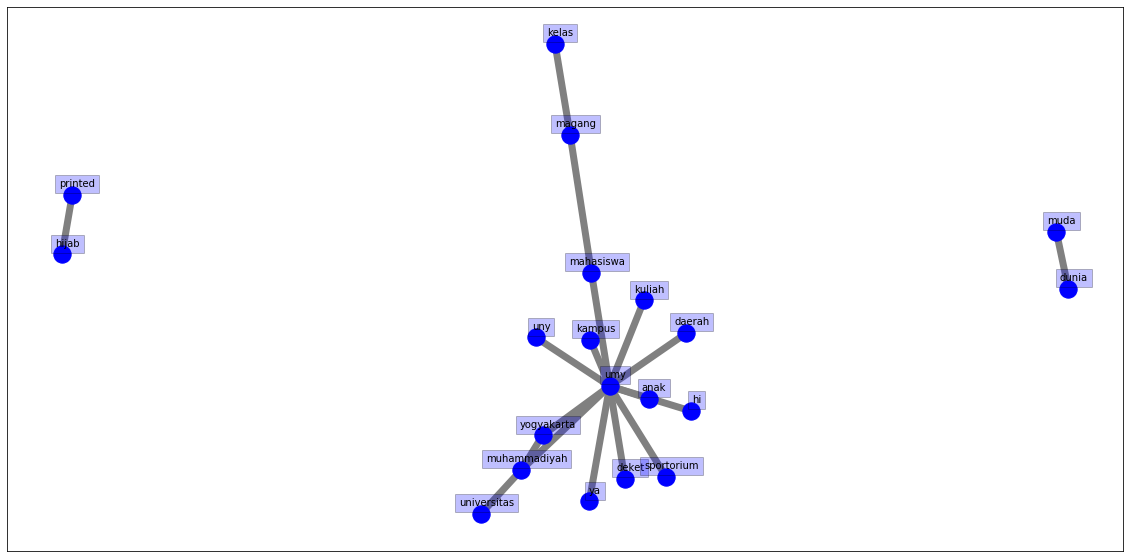

In [87]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [42]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(universitas, muhammadiyah, yogyakarta)    192
(kelas, magang, mahasiswa)                  72
(umy, manajemen, fakultas)                  68
(magang, mahasiswa, umy)                    68
(mahasiswa, umy, manajemen)                 68
                                          ... 
(dah, ntr, wkwk)                             1
(ijo, umy, buka)                             1
(plan, minggu, korang)                       1
(tu, lupa, wkwk)                             1
(blog, beasiswa, data)                       1
Length: 58820, dtype: int64

In [43]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [44]:
trigram_df

,index,trigram
0,"(universitas, muhammadiyah, yogyakarta)",192
1,"(kelas, magang, mahasiswa)",72
2,"(umy, manajemen, fakultas)",68
3,"(magang, mahasiswa, umy)",68
4,"(mahasiswa, umy, manajemen)",68
5,"(ekonomika, amp, bisnis)",68
6,"(amp, bisnis, universitas)",68
7,"(fakultas, ekonomika, amp)",68
8,"(manajemen, fakultas, ekonomika)",68
9,"(bisnis, universitas, muhammadiyah)",68


In [45]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [46]:
d1

[{('universitas', 'muhammadiyah', 'yogyakarta'): 192,
  ('kelas', 'magang', 'mahasiswa'): 72,
  ('umy', 'manajemen', 'fakultas'): 68,
  ('magang', 'mahasiswa', 'umy'): 68,
  ('mahasiswa', 'umy', 'manajemen'): 68,
  ('ekonomika', 'amp', 'bisnis'): 68,
  ('amp', 'bisnis', 'universitas'): 68,
  ('fakultas', 'ekonomika', 'amp'): 68,
  ('manajemen', 'fakultas', 'ekonomika'): 68,
  ('bisnis', 'universitas', 'muhammadiyah'): 68,
  ('muhammadiyah', 'yogyakarta', 'umy'): 66,
  ('bisnis', 'amal', 'lihat'): 46,
  ('paytren', 'sarana', 'bisnis'): 46,
  ('yogyakarta', 'target', 'amp'): 46,
  ('cipta', 'umy', 'insyaallah'): 46,
  ('akhirat', 'yuk', 'gabung'): 46,
  ('lihat', 'peluang', 'bisnis'): 46,
  ('muhammadiyah', 'yogyakarta', 'target'): 46,
  ('peluang', 'bisnis', 'yg'): 46,
  ('yg', 'cipta', 'umy'): 46}]

In [47]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("umy",weight=100)

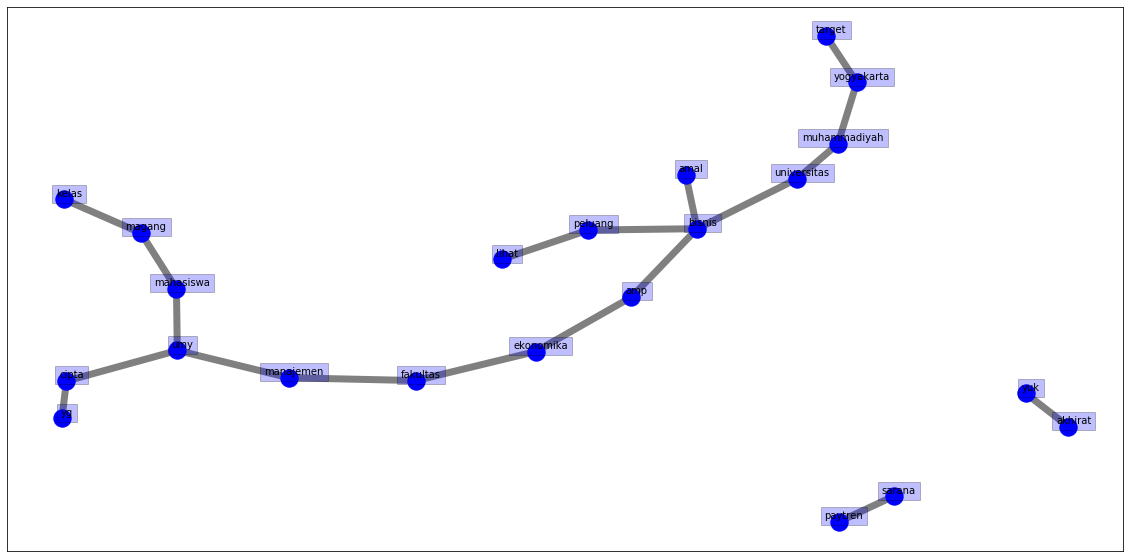

In [51]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [49]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus islam jogja\\umy'